In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


In [183]:
warnings.filterwarnings('ignore')


pd.set_option("display.max_rows" , 200)
pd.set_option("display.max_columns" , 50)
pd.set_option("display.width" , None)


In [184]:
# Reading the dataset: 
df = pd.read_csv('test.csv')

In [185]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,...,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [186]:
# we will start from the basic EDA now : 
df.shape

(1459, 80)

In [187]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Columns which are categorical wise are the object columns and which are Numerical wise are either Int or Float

Lets cehck for the null values for the dataset and Impude if necessary. 

In [189]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Columns which actually Have the Null values are either to be impuded or cleared : 
Lot Frontage 
Utilities
Exterior1 and 2nd
MasVnr Area
Bsm gzull bath



Columns which have pseudo Null Values and we dont need to touch them : 
Alley  - NA in this on to be replaced later - NO Alley Access
MasvnrType - Vaneer tyle can be nuyll if ti does not haev any type then  


Rest i will remove from the dataset :  just for this one or else in normal time i will keep them : 
Bzsment qual 
Basement Continue
Basement Exposure
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1

KitchenQual         1
Functional          2





In [190]:
df = df.rename(columns={'Id' : "Id"})


In [191]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,...,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [192]:
df_2 = pd.read_csv('sample_submission.csv')

In [193]:
df_2.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [194]:
# Now we will merge the data frames for the price and the other columns :
# df_merged = pd.merge(df1, df2, on='Id', how='inner')

df_merged = pd.merge(df , df_2 , on="Id" , how="inner")

df_merged.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,...,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,...,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [195]:
df_merged.shape

(1459, 81)

In [196]:
df_merged.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,...,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,...,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


The dataset in each type may have some values that are null so that we need to drop some columns and we need to drop some features for that as well as in any case every time there would be a column that would have a null value.  



In [197]:
df = df_merged.copy()

df.shape

(1459, 81)

In [198]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Univariate Analysis : 
<br>

<input type="checkbox"> 1. Check for the columns for mean median and mode and for the categorical values try to calculate the common values the categories most common frequency and check for the graphs - histogram and Box Plot </input>
<br>
<input type="checkbox"> 2. Check for IQR and Quarties and Percentiles. </input>
<br>
<input type="checkbox"> 3. Skeweness and Kurtosis analysis. </input>
<br>
<input type="checkbox"> 4. Optional  - Check for QQ plot and Shapio test and confirm if the data is distributed normally. and if QIR to be done before or later. </input>
<br>
<input type="checkbox"> 5. Make pivot table and window functions is possible and later make categorical column based on one column and make bins for the data for machine learning. </input>

The columns considered for Univate analysis : 
1. Sale Price - Numerical
2. Sale Condition  - Categorical 
3. Lot Area  - Numerical
4. Lot Frontage - Numerical
5. Year Built - Numerical
6. Heating  - Cateogrical 
7. Utilities - Categorical
8. Sale Type - Categorical


In [199]:
# Lets cehck the Mean Median and Mode for the numerical columns : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [200]:
def mmmd_calculator(column_name):
    name  = column_name.name
    print(f"Mean for the {name} is {column_name.mean()}")
    print(f"Median for the {name }is {column_name.median()}")
    print(f"Mode for the {name }is {column_name.mode()}")
    print(f"Standard deviation for{name}is {column_name.std()}")


mmmd_calculator(df['SalePrice'])
print("")
mmmd_calculator(df.LotFrontage)
print("")
mmmd_calculator(df.YearBuilt)
print("")
mmmd_calculator(df.LotArea)



Mean for the SalePrice is 179183.91824266256
Median for the SalePriceis 179208.665698449
Mode for the SalePriceis 0    174126.297156
1    174388.867433
Name: SalePrice, dtype: float64
Standard deviation forSalePriceis 16518.303050899856

Mean for the LotFrontage is 68.58035714285714
Median for the LotFrontageis 67.0
Mode for the LotFrontageis 0    60.0
Name: LotFrontage, dtype: float64
Standard deviation forLotFrontageis 22.376841280775125

Mean for the YearBuilt is 1971.357779300891
Median for the YearBuiltis 1973.0
Mode for the YearBuiltis 0    2005
Name: YearBuilt, dtype: int64
Standard deviation forYearBuiltis 30.39007083720525

Mean for the LotArea is 9819.161069225496
Median for the LotAreais 9399.0
Mode for the LotAreais 0    9600
Name: LotArea, dtype: int64
Standard deviation forLotAreais 4955.51732692645


Now for the categorical columns I cannot calcualte the mean median mode etc but we can calcualte the other useful statistics as: 

1. We can check the most frequency as : columnname.mode()[0]
2. Count for each category : column.value_counts()
3. Relative frequencey of each category  : column.value_counts(normalize=True) * 100
4. Number of unique cvateogries  : coilumn_name.nunique() 
5. The list of the unique categories : column_name.unique()
6. Missing value count  : column_name.isnull.sum() or isna.sum() 

In [201]:
def categorical_calculator(column_name):
    name  = column_name.name
    print(f"Most common frequency of {name} is {column_name.mode()[0]}")
    print(f"Count for each category in the {name} : {column_name.value_counts()}")
    print(f"Realtive Frequency of each category {name} : {column_name.value_counts(normalize = True)* 100}")
    print(f"Number of Unique Categories {name} are {column_name.unique()}")
    print(f"Missing Value Count of {name} is {column_name.isnull().sum()}" )



categorical_calculator(df.SaleCondition)
print("")
categorical_calculator(df.Utilities)
print("")
categorical_calculator(df.Heating)

    

Most common frequency of SaleCondition is Normal
Count for each category in the SaleCondition : SaleCondition
Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: count, dtype: int64
Realtive Frequency of each category SaleCondition : SaleCondition
Normal     82.522276
Partial     8.224812
Abnorml     6.100069
Family      1.782042
Alloca      0.822481
AdjLand     0.548321
Name: proportion, dtype: float64
Number of Unique Categories SaleCondition are ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Missing Value Count of SaleCondition is 0

Most common frequency of Utilities is AllPub
Count for each category in the Utilities : Utilities
AllPub    1457
Name: count, dtype: int64
Realtive Frequency of each category Utilities : Utilities
AllPub    100.0
Name: proportion, dtype: float64
Number of Unique Categories Utilities are ['AllPub' nan]
Missing Value Count of Utilities is 2

Most common frequency of Heating is GasA
Count for ea

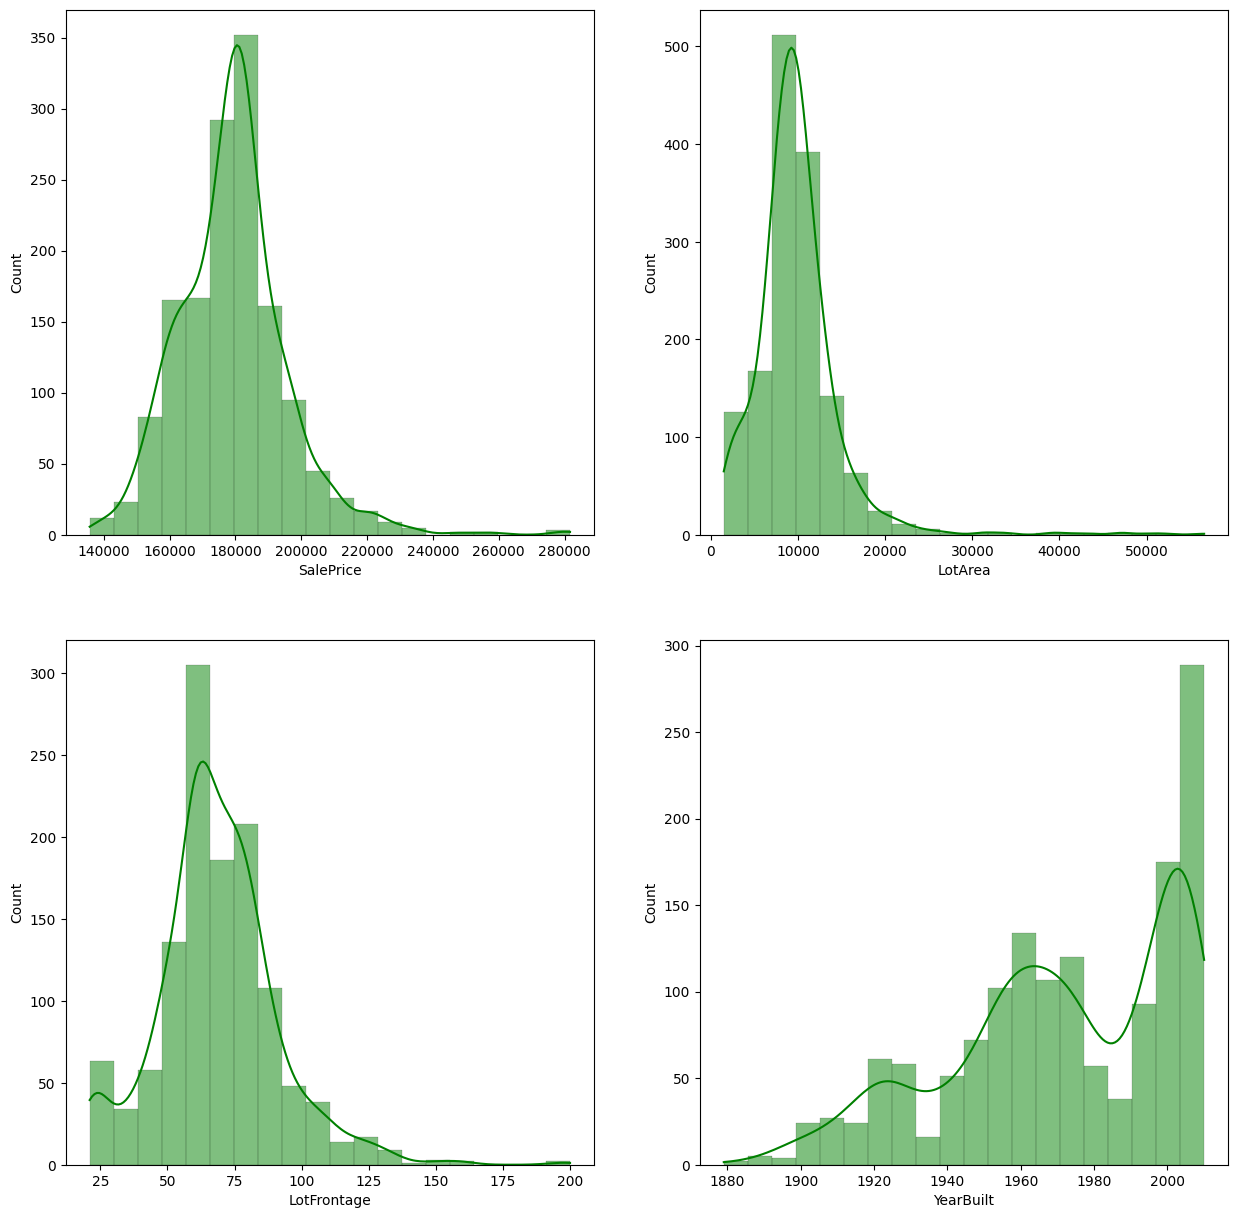

In [202]:
# Lets check every column graphically  :

# For Numerical Columns : Make all the plots in single Plot :

plt.figure(figsize=(15 , 15))

plt.subplot(2,  2 , 1)
sns.histplot(data=df , x=df.SalePrice , color="green" , linewidth = 0.1 , kde=True , bins=20)


plt.subplot(2 , 2 ,2)
sns.histplot(data=df , x = df.LotArea , color="green" , linewidth = 0.1 , kde = True , bins = 20)

plt.subplot(2 , 2 ,3)
sns.histplot(data=df , x = df.LotFrontage , color="green" , linewidth = 0.1 , kde=True , bins = 20)

plt.subplot(2 ,2, 4 )
sns.histplot(data=df , x=df.YearBuilt , color="green" , linewidth = 0.1 , kde=True , bins = 20 )


plt.show()

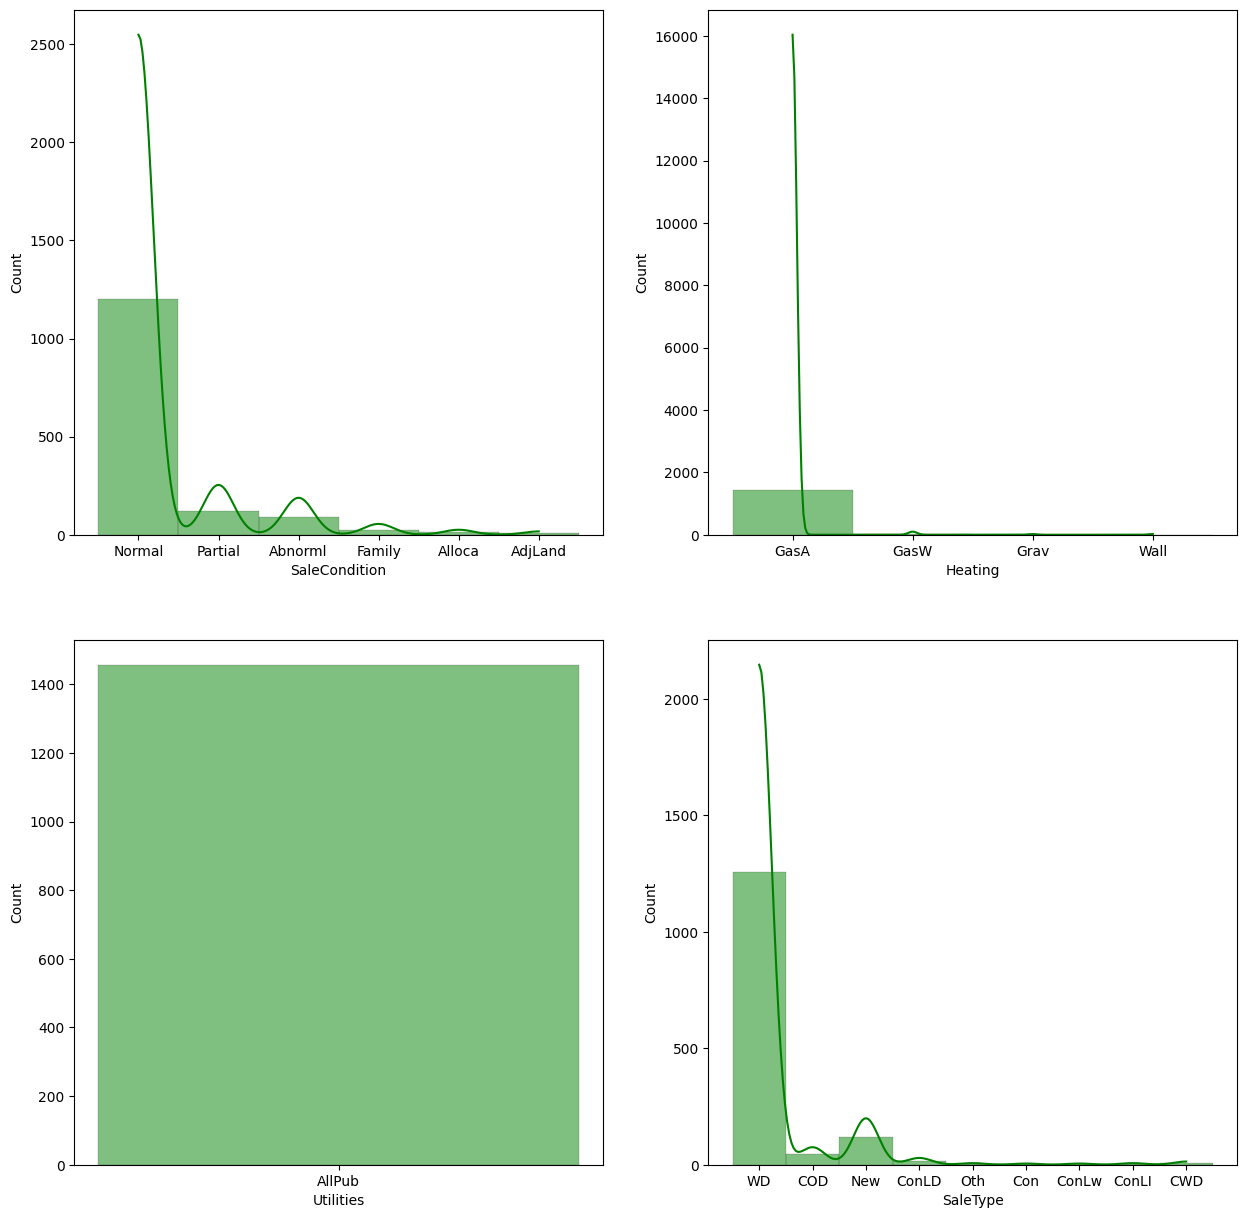

In [203]:
# Lets Chekc for the categorical columns : 

plt.figure(figsize=(15 , 15))

plt.subplot(2,  2 , 1)
sns.histplot(data=df , x=df.SaleCondition , color="green" , linewidth = 0.1 , kde=True , bins=20)


plt.subplot(2 , 2 ,2)
sns.histplot(data=df , x = df.Heating , color="green" , linewidth = 0.1 , kde = True , bins = 20)

plt.subplot(2 , 2 ,3)
sns.histplot(data=df , x = df.Utilities , color="green" , linewidth = 0.1 , kde=True , bins = 20)

plt.subplot(2 ,2, 4 )
sns.histplot(data=df , x=df.SaleType , color="green" , linewidth = 0.1 , kde=True , bins = 20 )


plt.show()

In [204]:
# Lets check for the Boxplot for the values : 


def box_plot(column_name ):
    name  = column_name.name
    sns.boxplot(data=df , x = name)
    plt.show()

The columns considered for Univate analysis : 
1. Sale Price - Numerical
2. Sale Condition  - Categorical 
3. Lot Area  - Numerical
4. Lot Frontage - Numerical
5. Year Built - Numerical
6. Heating  - Cateogrical 
7. Utilities - Categorical
8. Sale Type - Categorical

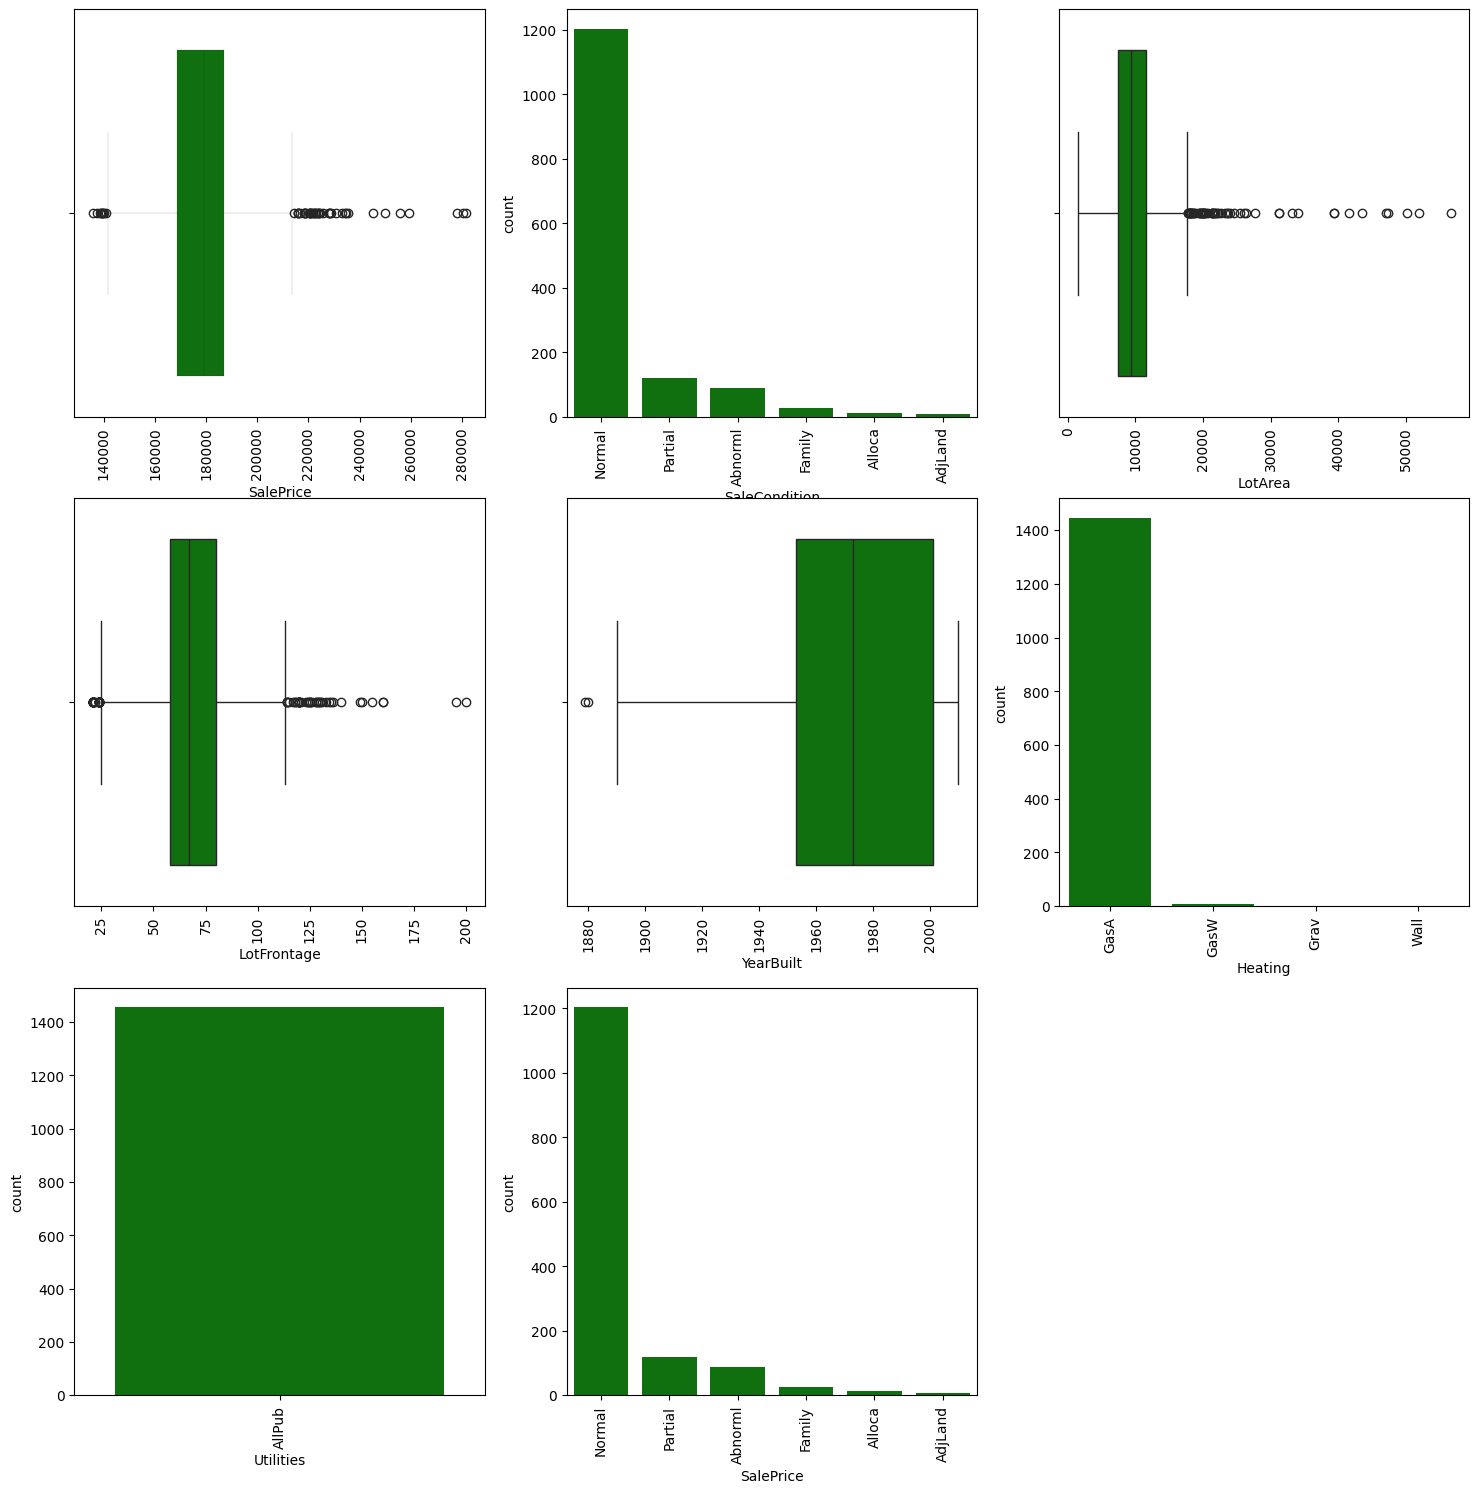

In [205]:

plt.figure(figsize=(18 , 18))
plt.subplot(3 , 3,1)
plt.xlabel(df.SalePrice.name)
plt.xticks(rotation = 90)
sns.boxplot(data = df , x = df['SalePrice']  , color="green" , linewidth=0.1)

plt.subplot( 3, 3, 2)
plt.xlabel(df.SaleCondition.name)
plt.xticks(rotation = 90)
sns.countplot(data= df , x = df.SaleCondition , color="green")


plt.subplot( 3 , 3, 3)
plt.xlabel(df.LotArea.name)
plt.xticks(rotation = 90)
sns.boxplot(data = df , x = df.LotArea , color="green")

plt.subplot(3 , 3 ,4)
plt.xlabel(df.LotFrontage.name)
plt.xticks(rotation = 90)
sns.boxplot(data = df , x = df.LotFrontage , color="green")

plt.subplot(3 , 3 ,5)
plt.xlabel(df.YearBuilt.name)
plt.xticks(rotation = 90)
sns.boxplot(data=df ,x = df.YearBuilt , color="green")

plt.subplot(3 , 3 ,6)
plt.xlabel(df.Heating.name)
plt.xticks(rotation = 90)
sns.countplot(data=df , x = df.Heating, color="green")

plt.subplot(3 , 3, 7)
plt.xlabel(df.Utilities.name)
plt.xticks(rotation = 90)
sns.countplot(data = df  , x = df.Utilities, color="green")

plt.subplot(3 , 3 ,8)
plt.xlabel(df.SalePrice.name)
plt.xticks(rotation = 90)
sns.countplot(data = df , x = df.SaleCondition, color="green")

plt.show()



As we have seen that there some outliers in the dataframe, we need to remove the outliers we can do that by two methods one is using IQR and other using Z score :  to decide lets check the skew and kurtosis analysis on the data frame first  :  

In [206]:
numerical_columns   = df.select_dtypes(include=['number'])
print(numerical_columns)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          1961          1961  

In [207]:
from scipy.stats import skew , kurtosis

skew_values  = numerical_columns.skew()

print(skew_values)

Id                0.000000
MSSubClass        1.346690
LotFrontage       0.661921
LotArea           3.115217
OverallQual       0.181196
OverallCond       0.449165
YearBuilt        -0.587657
YearRemodAdd     -0.399906
MasVnrArea        2.533377
BsmtFinSF1        1.165677
BsmtFinSF2        4.041345
BsmtUnfSF         0.919916
TotalBsmtSF       0.813589
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtFullBath      0.649698
BsmtHalfBath      3.779866
FullBath          0.295839
HalfBath          0.714728
BedroomAbvGr      0.436623
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
GarageYrBlt      -0.158363
GarageCars       -0.107142
GarageArea        0.300239
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
MoSold            0.183022
YrSold            0.168986
S

In [208]:
skew_values = pd.Series(skew_values)

print(skew_values)

Id                0.000000
MSSubClass        1.346690
LotFrontage       0.661921
LotArea           3.115217
OverallQual       0.181196
OverallCond       0.449165
YearBuilt        -0.587657
YearRemodAdd     -0.399906
MasVnrArea        2.533377
BsmtFinSF1        1.165677
BsmtFinSF2        4.041345
BsmtUnfSF         0.919916
TotalBsmtSF       0.813589
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtFullBath      0.649698
BsmtHalfBath      3.779866
FullBath          0.295839
HalfBath          0.714728
BedroomAbvGr      0.436623
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
GarageYrBlt      -0.158363
GarageCars       -0.107142
GarageArea        0.300239
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
MoSold            0.183022
YrSold            0.168986
S

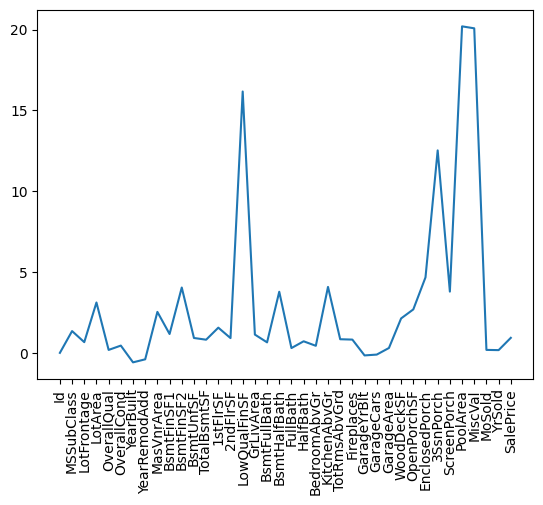

In [209]:
sns.lineplot(data=skew_values)
plt.xticks(rotation = 90)
plt.show()

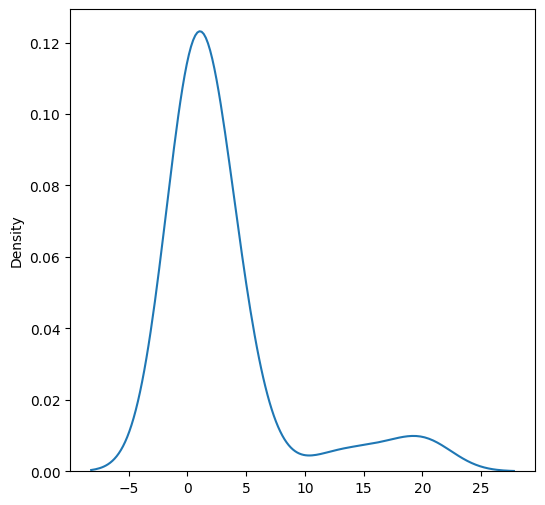

In [210]:
# Lets chekc the skew values in the form of Distributon so that we can visualize it : 
plt.figure(figsize=(6 , 6))
sns.kdeplot(data = skew_values)
plt.show()

We can see that the data is highly left skewed and IQR would be the best method for removing the outliers. Before performing the IQR lets see the Peak of the data using kurtosis

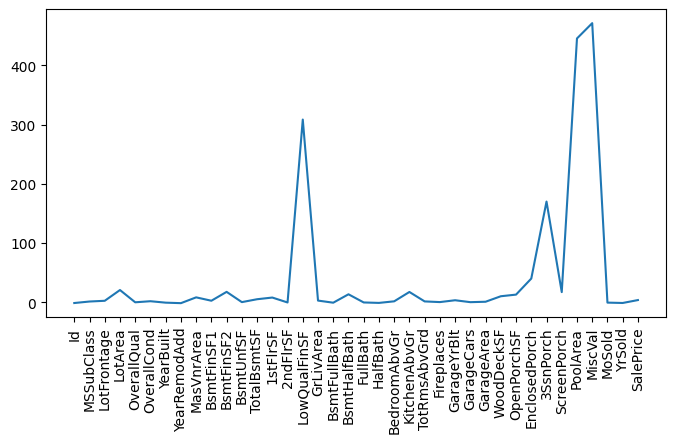

In [211]:
kurtosis_values  = numerical_columns.kurtosis()

plt.figure(figsize=(8 ,4))
sns.lineplot(data=kurtosis_values)
plt.xticks(rotation = 90)
plt.show()

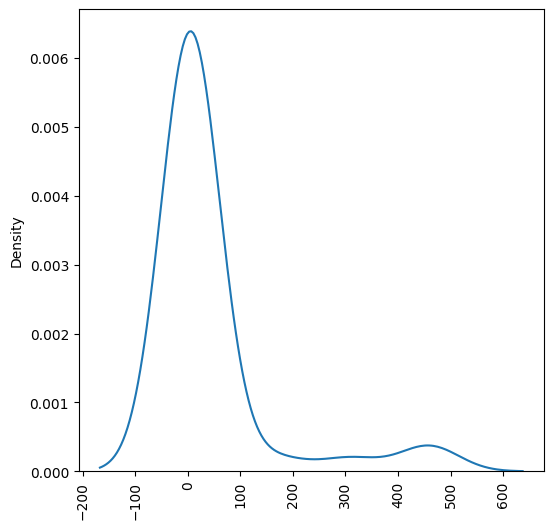

In [212]:
plt.figure(figsize=(6 , 6))
sns.kdeplot(data=kurtosis_values)
plt.xticks(rotation = 90)
plt.show()

In [213]:
# Lets change the data to remove the outliers  : 

numerical_columns   = df.select_dtypes(include=['number'])
numerical_columns = pd.DataFrame(numerical_columns)

categorical_columns   = df.select_dtypes(include=['object'])
categorical_columns  = pd.DataFrame(categorical_columns)



In [214]:
numerical_columns.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,169277.052498
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,187758.393989
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,183583.683570
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,179317.477511
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,150730.079977


In [215]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [ ]:
# Check for the quantile values : 

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

IQR = Q3 - Q1

lower_bound  = Q1 - 1.5 * IQR
upper_bound   = Q3 + 1.5 * IQR


for col in numerical_columns.columns:
    lb = lower_bound[col]
    up = upper_bound[col]
    numerical_columns[col] = numerical_columns[col].clip(lower=lb , upper=up)


In [222]:
numerical_columns.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622.0,5,6.0,1961,1961,0.0,468.0,0.0,270.0,882.0,896,0,0,896.0,0.0,0.0,1.0,0,2.0,1,5,0.0,1961.0,1.0,730.0,140,0,0,0,0,0,0,6,2010,169277.052498
1,1462,20,81.0,14267.0,6,6.0,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329.0,0.0,0.0,1.0,1,3.0,1,6,0.0,1958.0,1.0,312.0,393,36,0,0,0,0,0,6,2010,187758.393989
2,1463,60,74.0,13830.0,5,5.0,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629.0,0.0,0.0,2.0,1,3.0,1,6,1.0,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,183583.683570
3,1464,60,78.0,9978.0,6,6.0,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604.0,0.0,0.0,2.0,1,3.0,1,7,1.0,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,179317.477511
4,1465,120,43.0,5005.0,8,5.0,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280.0,0.0,0.0,2.0,0,2.0,1,5,0.0,1992.0,2.0,506.0,0,82,0,0,0,0,0,1,2010,150730.079977


<Axes: xlabel='SalePrice'>

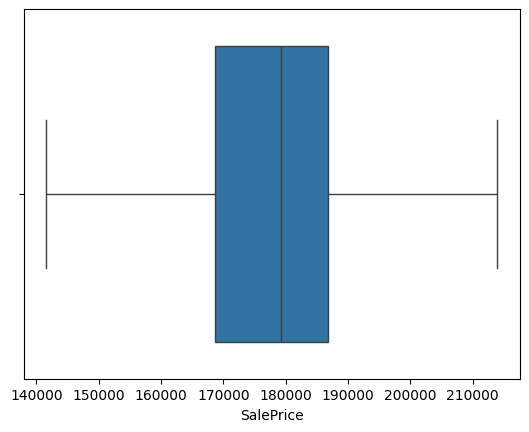

In [223]:
sns.boxplot(data = numerical_columns , x = numerical_columns.SalePrice)

Now we can see there are not outliers in the dataframe now we can proceed with the multivariate analysis. 


In [224]:
numerical_columns.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622.0,5,6.0,1961,1961,0.0,468.0,0.0,270.0,882.0,896,0,0,896.0,0.0,0.0,1.0,0,2.0,1,5,0.0,1961.0,1.0,730.0,140,0,0,0,0,0,0,6,2010,169277.052498
1,1462,20,81.0,14267.0,6,6.0,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329.0,0.0,0.0,1.0,1,3.0,1,6,0.0,1958.0,1.0,312.0,393,36,0,0,0,0,0,6,2010,187758.393989
2,1463,60,74.0,13830.0,5,5.0,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629.0,0.0,0.0,2.0,1,3.0,1,6,1.0,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,183583.683570
3,1464,60,78.0,9978.0,6,6.0,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604.0,0.0,0.0,2.0,1,3.0,1,7,1.0,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,179317.477511
4,1465,120,43.0,5005.0,8,5.0,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280.0,0.0,0.0,2.0,0,2.0,1,5,0.0,1992.0,2.0,506.0,0,82,0,0,0,0,0,1,2010,150730.079977


In [225]:
categorical_columns.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,NaN,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [227]:
print(numerical_columns.shape)
print(categorical_columns.shape)

(1459, 38)
(1459, 43)


In [228]:
df = pd.concat([numerical_columns, categorical_columns], axis=1)

df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622.0,5,6.0,1961,1961,0.0,468.0,0.0,270.0,882.0,896,0,0,896.0,0.0,0.0,1.0,0,2.0,1,5,0.0,...,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,1462,20,81.0,14267.0,6,6.0,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329.0,0.0,0.0,1.0,1,3.0,1,6,0.0,...,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,1463,60,74.0,13830.0,5,5.0,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629.0,0.0,0.0,2.0,1,3.0,1,6,1.0,...,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,1464,60,78.0,9978.0,6,6.0,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604.0,0.0,0.0,2.0,1,3.0,1,7,1.0,...,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,1465,120,43.0,5005.0,8,5.0,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280.0,0.0,0.0,2.0,0,2.0,1,5,0.0,...,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Now the dataframe are merged. we can start doing Multivariate Analysis now. 




